In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
credit_card_data = pd.read_csv('creditcard.csv(1)')

In [5]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [7]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [8]:
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
credit_card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [11]:
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


<AxesSubplot:xlabel='Class', ylabel='count'>

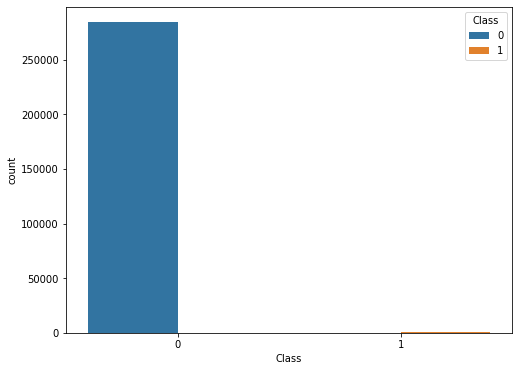

In [12]:
plt.figure(figsize=(8,6))
sns.countplot(credit_card_data['Class'], 
              hue =credit_card_data['Class'])

In [13]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [14]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [15]:
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [16]:
legit_sample = legit.sample(n=492)

In [17]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [18]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
118975,75282.0,1.391477,-0.505772,-0.417184,-1.096165,-0.010765,0.155183,-0.354105,0.048728,-1.197452,...,-0.195569,-0.758369,-0.008515,-1.178462,0.379866,-0.445959,-0.011218,-0.008855,30.00,0
161125,113904.0,1.456666,-1.220570,-0.578749,0.685096,-1.041336,-0.598181,-0.172077,-0.081741,1.387948,...,-0.022539,-0.558454,0.154462,-0.069734,-0.573571,-0.644584,-0.018367,0.013465,275.19,0
179589,124147.0,-19.163828,-18.229512,-2.843465,4.215061,6.327694,-1.261684,1.440955,-1.974780,3.175489,...,-6.302237,1.385096,9.706584,-0.459025,3.844345,1.080716,4.956354,0.739841,456.12,0
130625,79394.0,-2.339830,2.498586,0.263805,2.670226,-0.695142,0.128877,-0.388814,0.740883,-0.608889,...,0.132209,0.068173,0.199860,0.043344,-0.382781,0.064472,-0.792461,0.214311,9.80,0
60683,49447.0,1.256033,0.327598,0.296121,0.695885,-0.401513,-1.078707,0.062467,-0.183081,0.087398,...,-0.291983,-0.860519,0.132844,0.329959,0.204549,0.095934,-0.025472,0.030028,1.98,0


In [20]:
new_dataset['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [21]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,96187.146341,-0.030610,-0.038184,-0.061964,0.010947,-0.135466,0.039224,-0.001300,0.012407,0.019017,...,-0.015931,-0.043196,-0.014295,0.058599,-0.004916,-0.022146,-0.015166,0.023947,-0.005898,105.656728
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [23]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']
print(X)

            Time         V1         V2        V3        V4        V5  \
118975   75282.0   1.391477  -0.505772 -0.417184 -1.096165 -0.010765   
161125  113904.0   1.456666  -1.220570 -0.578749  0.685096 -1.041336   
179589  124147.0 -19.163828 -18.229512 -2.843465  4.215061  6.327694   
130625   79394.0  -2.339830   2.498586  0.263805  2.670226 -0.695142   
60683    49447.0   1.256033   0.327598  0.296121  0.695885 -0.401513   
...          ...        ...        ...       ...       ...       ...   
279863  169142.0  -1.927883   1.125653 -4.518331  1.749293 -1.566487   
280143  169347.0   1.378559   1.289381 -5.004247  1.411850  0.442581   
280149  169351.0  -0.676143   1.126366 -2.213700  0.468308 -1.120541   
281144  169966.0  -3.113832   0.585864 -5.399730  1.817092 -0.840618   
281674  170348.0   1.991976   0.158476 -2.583441  0.408670  1.151147   

              V6        V7        V8        V9  ...        V20       V21  \
118975  0.155183 -0.354105  0.048728 -1.197452  ...   0.091

In [24]:
print(Y)

118975    0
161125    0
179589    0
130625    0
60683     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size=0.2, 
                                                    stratify=Y, 
                                                    random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [28]:
model = LogisticRegression()

In [30]:
model.fit(X_train, Y_train)

LogisticRegression()

In [31]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy on Training data: ', training_data_accuracy)

Accuracy on Training data:  0.9390088945362135


In [32]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score on Test Data: ', test_data_accuracy)

Accuracy score on Test Data:  0.9289340101522843
